<H1>                    Capstone Project - The Battle of Neighborhoods </H1>

<H2> FINDING SAFER AND DESIRABLE NEIGHBOURHOOD FOR PROSPECTIVE LONDON HOUSE BUYERS </H2>

<h3> 1. Problem Rational </h3>

Finding in a safe a conducive environnment where one could live, work, socialise or raise a family in security is a fundamental need for all human beings anywhere in the world. London is one of the most exiting and safer cities to live in. However, like most metropolitan cities it also has its fair share of security issues. It is said that buying a property is one of the most important financial decisions that one could make in his/her lifetime. <br/>
Consequently, when one decides to make that important purchase, in a city as expensive as London the stakes are hightened and potential property buyers go to great lengths in picking the best area. <br/>

After Value for money, one of the criteria is the level of crimes and the types of crime committed in a given neighbourhood of interest. <br/>
A desirable area is defined by not only the level of the safety it affords its inhabitants but also what is available locally, so the venues that they can enjoy locally. <br/> In this assignment we will look at both the level crimes committed and the venues available in each London borough. <br/>

The information that we are providing could be made available within property websites to help potential buyers informed choices. 

<h3> 2. London Crime Data </h3>

The data

The data used for this assignement is obtained from the UK govenment website: https://data.london.gov.uk/dataset/recorded_crime_summary

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read crime records data
crime = pd.read_csv("https://data.london.gov.uk/download/recorded_crime_summary/d2e9ccfc-a054-41e3-89fb-53c2bc3ed87a/MPS%20Borough%20Level%20Crime%20%28most%20recent%2024%20months%29.csv")
crime.head()

,MajorText,MinorText,LookUp_BoroughName,201807,201808,201809,201810,201811,201812,201901,...,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006
0,Arson and Criminal Damage,Arson,Barking and Dagenham,6,5,3,8,5,1,5,...,6,9,8,6,4,5,6,2,2,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,127,101,107,132,105,88,97,...,109,109,97,121,97,103,107,80,86,121
2,Burglary,Burglary - Business and Community,Barking and Dagenham,30,18,33,32,39,33,45,...,37,30,30,25,31,17,28,29,16,16
3,Burglary,Burglary - Residential,Barking and Dagenham,94,84,99,94,106,164,114,...,80,97,114,130,116,123,97,57,41,63
4,Drug Offences,Drug Trafficking,Barking and Dagenham,8,7,10,7,7,4,5,...,7,8,13,3,14,5,6,12,12,7


In [3]:
# Find the sum of incidents in each London Bouroughs in the last 24 months
crime['Sum'] = crime.iloc[:,3:27].sum(axis=1)
crimesum = crime['Sum']
crime.drop(labels=['Sum'], axis=1,inplace = True)
crime.insert(3, 'Sum', crimesum)
crime.head()

,MajorText,MinorText,LookUp_BoroughName,Sum,201807,201808,201809,201810,201811,201812,...,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006
0,Arson and Criminal Damage,Arson,Barking and Dagenham,119,6,5,3,8,5,1,...,6,9,8,6,4,5,6,2,2,4
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2687,127,101,107,132,105,88,...,109,109,97,121,97,103,107,80,86,121
2,Burglary,Burglary - Business and Community,Barking and Dagenham,683,30,18,33,32,39,33,...,37,30,30,25,31,17,28,29,16,16
3,Burglary,Burglary - Residential,Barking and Dagenham,2323,94,84,99,94,106,164,...,80,97,114,130,116,123,97,57,41,63
4,Drug Offences,Drug Trafficking,Barking and Dagenham,181,8,7,10,7,7,4,...,7,8,13,3,14,5,6,12,12,7


In [4]:
# View Data size
crime.shape

(1569, 28)

In [5]:
# Names of Boroughs

print(crime['LookUp_BoroughName'].unique())

['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'London Heathrow and London City Airports' 'Merton'
 'Newham' 'Redbridge' 'Richmond upon Thames' 'Southwark' 'Sutton'
 'Tower Hamlets' 'Waltham Forest' 'Wandsworth' 'Westminster']


In [6]:
# Calculate the number of incidents in the last 24 months by boroughs
crime = crime.groupby(['LookUp_BoroughName'], as_index=False).sum()
crime.sort_values(by='Sum', ascending=False)


,LookUp_BoroughName,Sum,201807,201808,201809,201810,201811,201812,201901,201902,...,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006
32,Westminster,142096,5588,5464,4989,5584,6083,6743,6280,6509,...,6377,7207,6852,7473,6395,6686,4695,1703,2249,2953
27,Southwark,73726,3341,3066,2966,3223,3158,2911,3064,3011,...,3395,3636,3351,3155,2969,3032,2442,1837,2218,2517
5,Camden,72764,3114,2859,2894,3056,3138,2966,3060,3173,...,3350,3740,3458,3194,3231,3451,2710,1630,1859,2070
24,Newham,70182,3116,2970,2948,3139,3156,2998,2829,2887,...,2828,3320,3062,2840,3024,2900,2583,2065,2317,2681
20,Lambeth,68701,3371,2917,2804,2913,3049,2722,2780,2769,...,3025,3145,2980,2868,2927,2673,2502,1874,2239,2479
29,Tower Hamlets,67381,3146,2893,2853,2931,2901,2695,2684,2645,...,2775,3062,3064,2885,2753,2675,2491,1903,2258,2510
6,Croydon,66117,2706,2579,2515,2813,2621,2646,2642,2570,...,2892,3074,2987,2771,3056,2902,2979,2238,2486,2727
10,Hackney,64943,2749,2628,2683,2882,2878,2740,2722,2531,...,2961,2927,2798,2675,2769,2616,2366,1629,2160,2385
12,Haringey,61869,2863,2476,2508,2551,2709,2570,2611,2520,...,2713,2891,2677,2522,2469,2441,2432,2019,2068,2316
7,Ealing,60522,2514,2277,2420,2554,2597,2292,2550,2463,...,2643,2723,2816,2602,2691,2429,2359,1983,2267,2319


<H2> NUMBER OF MONTHLY CRIMES IN EACH LONDON BOROUGH </H2>

In [7]:
# What is monthly average of incidents
crime['Sum'] = crime['Sum']/24
crime.rename(columns={crime.columns[1]:'MonthlyAverage'}, inplace=True)
crime

,LookUp_BoroughName,MonthlyAverage,201807,201808,201809,201810,201811,201812,201901,201902,...,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006
0,Barking and Dagenham,1616.166667,1612,1460,1469,1584,1562,1544,1581,1576,...,1646,1790,1658,1653,1670,1581,1792,1270,1444,1625
1,Barnet,2467.208333,2368,2244,2264,2550,2561,2421,2412,2545,...,2611,2629,2830,2606,2640,2590,2298,1659,1979,2068
2,Bexley,1403.833333,1238,1243,1263,1341,1412,1468,1543,1348,...,1491,1673,1537,1402,1623,1461,1283,902,1218,1181
3,Brent,2496.708333,2750,2510,2556,2728,2732,2388,2491,2372,...,2561,2661,2507,2423,2513,2382,2266,2025,2242,2397
4,Bromley,1983.833333,1927,1854,1941,1970,1989,1992,2000,1956,...,2118,2226,2294,2089,2147,2074,1765,1443,1638,1685
5,Camden,3031.833333,3114,2859,2894,3056,3138,2966,3060,3173,...,3350,3740,3458,3194,3231,3451,2710,1630,1859,2070
6,Croydon,2754.875000,2706,2579,2515,2813,2621,2646,2642,2570,...,2892,3074,2987,2771,3056,2902,2979,2238,2486,2727
7,Ealing,2521.750000,2514,2277,2420,2554,2597,2292,2550,2463,...,2643,2723,2816,2602,2691,2429,2359,1983,2267,2319
8,Enfield,2443.666667,2372,2284,2295,2442,2501,2372,2507,2345,...,2548,2670,2809,2541,2593,2480,2366,1855,2197,2335
9,Greenwich,2285.458333,2277,2083,2238,2280,2241,2260,2240,2053,...,2571,2497,2506,2197,2373,2301,2064,1648,2048,2170


<H2>NUMBER OF DAILY CRIMES IN EACH LONDON BOROUGH </H2>

In [8]:
# What is monthly average of incidents
crime['MonthlyAverage'] = crime['MonthlyAverage']/30
crime.rename(columns={crime.columns[1]:'DailyAverage'}, inplace=True)
crime.sort_values(by='DailyAverage', ascending=False)
crime

,LookUp_BoroughName,DailyAverage,201807,201808,201809,201810,201811,201812,201901,201902,...,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006
0,Barking and Dagenham,53.872222,1612,1460,1469,1584,1562,1544,1581,1576,...,1646,1790,1658,1653,1670,1581,1792,1270,1444,1625
1,Barnet,82.240278,2368,2244,2264,2550,2561,2421,2412,2545,...,2611,2629,2830,2606,2640,2590,2298,1659,1979,2068
2,Bexley,46.794444,1238,1243,1263,1341,1412,1468,1543,1348,...,1491,1673,1537,1402,1623,1461,1283,902,1218,1181
3,Brent,83.223611,2750,2510,2556,2728,2732,2388,2491,2372,...,2561,2661,2507,2423,2513,2382,2266,2025,2242,2397
4,Bromley,66.127778,1927,1854,1941,1970,1989,1992,2000,1956,...,2118,2226,2294,2089,2147,2074,1765,1443,1638,1685
5,Camden,101.061111,3114,2859,2894,3056,3138,2966,3060,3173,...,3350,3740,3458,3194,3231,3451,2710,1630,1859,2070
6,Croydon,91.829167,2706,2579,2515,2813,2621,2646,2642,2570,...,2892,3074,2987,2771,3056,2902,2979,2238,2486,2727
7,Ealing,84.058333,2514,2277,2420,2554,2597,2292,2550,2463,...,2643,2723,2816,2602,2691,2429,2359,1983,2267,2319
8,Enfield,81.455556,2372,2284,2295,2442,2501,2372,2507,2345,...,2548,2670,2809,2541,2593,2480,2366,1855,2197,2335
9,Greenwich,76.181944,2277,2083,2238,2280,2241,2260,2240,2053,...,2571,2497,2506,2197,2373,2301,2064,1648,2048,2170


<H3> SHOW CRIMES COMMITTED IN GRAPH <H3>

The Graph would succinly display daily average crimes committed in each borough in descending order

In [9]:
import matplotlib.pyplot as plt

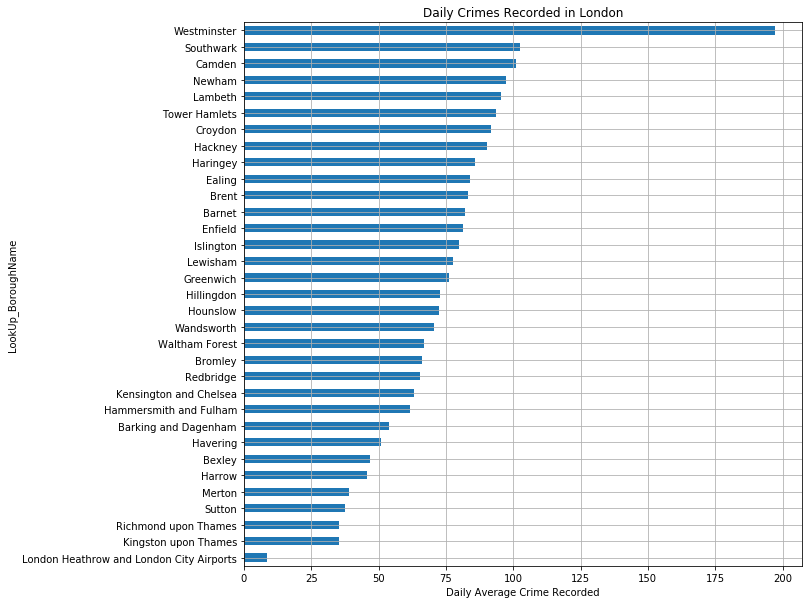

In [10]:
#Visualize crime data
crime.set_index('LookUp_BoroughName')['DailyAverage'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.xlabel('Daily Average Crime Recorded')
plt.title('Daily Crimes Recorded in London')
plt.show()

<H3> 3. ANALYSIS OF VENUES IN EACH BOROUGH <H3>

In this section we look at the venues that are available in each London Borough.

<H3> RETRIEVE LONDON BOROUGHS COORDINATES <H3>

We obtain the coordinates for each borough from WIKIPEDIA. This data would be used to retrieve all ameneties that exist in a given neighbourhood.<br>
URL: url: https://en.wikipedia.org/wiki/List_of_London_boroughs

In [11]:
pip install lxml

     |████████████████████████████████| 5.5MB 5.2MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install bs4

     |████████████████████████████████| 122kB 14.6MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
Note: you may need to restart the kernel to use updated packages.


In [13]:
# IMPORT LIBRARIES
import requests
import lxml
from bs4 import BeautifulSoup

In [14]:
# Obtaining data from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of London boroughs - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"a1f9bcdb-a3e8-4674-b5c3-3543681f2178","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_London_boroughs","wgTitle":"List of London boroughs","wgCurRevisionId":958873870,"wgRevisionId":958873870,"wgArticleId":28092685,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use dmy dates from August 2015","Use British English from August 2015","Lists of coordinates","Geographic coordinat

In [15]:
 # Let's list boroughs with their coordinates
Borough = []
TotalPopulation = []
Coordinates = []

for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        Borough.append(cells[0].text.rstrip('\n'))
        TotalPopulation.append(cells[7].text.rstrip('\n'))
        Coordinates.append(cells[8].text.rstrip('\n'))

        # Form a dataframe
dict = {'LookUp_BoroughName' : Borough,
       'Population' : TotalPopulation,
       'Coordinates': Coordinates}
BoroughCoordinates = pd.DataFrame.from_dict(dict)
BoroughCoordinates

,LookUp_BoroughName,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...
5,Camden,"229,719",51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ /...
6,Croydon,"372,752",51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ /...
7,Ealing,"342,494",51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ /...
8,Enfield,"320,524",51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ /...
9,Greenwich [note 2],"264,008",51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ /...


In [16]:
# Split coordinates
BoroughCoordinates[['Coordinates1','Coordinates2','Coordinates3']] = BoroughCoordinates['Coordinates'].str.split('/',expand=True)
BoroughCoordinates.head()

,LookUp_BoroughName,Population,Coordinates,Coordinates1,Coordinates2,Coordinates3
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [17]:
# organise data into LATITUDE and LONGITUDE
BoroughCoordinates.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
BoroughCoordinates[['Latitude','Longitude']] = BoroughCoordinates['Coordinates3'].str.split(';',expand=True)
BoroughCoordinates.drop(labels=['Coordinates3'], axis=1,inplace = True)
BoroughCoordinates['Latitude'] = BoroughCoordinates['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
BoroughCoordinates['Latitude'] = BoroughCoordinates['Latitude'].map(lambda x: x.lstrip())
BoroughCoordinates['Longitude'] = BoroughCoordinates['Longitude'].map(lambda x: x.rstrip(')'))
BoroughCoordinates['Longitude'] = BoroughCoordinates['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
BoroughCoordinates['Longitude'] = BoroughCoordinates['Longitude'].map(lambda x: x.rstrip(' ('))
BoroughCoordinates['Longitude'] = BoroughCoordinates['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
BoroughCoordinates['Longitude'] = BoroughCoordinates['Longitude'].map(lambda x: x.lstrip())
BoroughCoordinates['Population'] = BoroughCoordinates['Population'].str.replace(',','')
BoroughCoordinates.head()

,LookUp_BoroughName,Population,Latitude,Longitude
0,Barking and Dagenham [note 1],194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


<H3> Use Foursquare API to Retrieve Local Venues</H3>

#### Define Foursquare Credentials and Version

In [18]:
CLIENT_ID = 'SASIAY1V1W5KTJU1OP3L2GCFRGR4HDAESIVT1MWJM4WDWNO5' # your Foursquare ID
CLIENT_SECRET = 'S4CWMQ5GGTDBG4JK0TNV2EXYZ0SXPE04P2DKT0PFD1EMZ3ZY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SASIAY1V1W5KTJU1OP3L2GCFRGR4HDAESIVT1MWJM4WDWNO5
CLIENT_SECRET:S4CWMQ5GGTDBG4JK0TNV2EXYZ0SXPE04P2DKT0PFD1EMZ3ZY


In [40]:
#Create a function to explore all borough
def LocalVenues(names, latitudes, longitudes, radius=1000):
    
    venues=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues for item in venue_list])
    nearby_venues.columns = ['BoroughName', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [44]:
LIMIT=50
BoroughVenues = LocalVenues(names=BoroughCoordinates['LookUp_BoroughName'],latitudes=BoroughCoordinates['Latitude'],longitudes=BoroughCoordinates['Longitude']
                                  )

Barking and Dagenham [note 1]
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich [note 2]
Hackney
Hammersmith and Fulham [note 4]
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [48]:
BoroughVenues

,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham [note 1],51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham [note 1],51.5607,0.1557,Iceland,51.560578,0.147685,Grocery Store
2,Barking and Dagenham [note 1],51.5607,0.1557,Shell,51.560415,0.148364,Gas Station
3,Barking and Dagenham [note 1],51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center
4,Barking and Dagenham [note 1],51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
...,...,...,...,...,...,...,...
1451,Westminster,51.4973,-0.1372,About Thyme Bar & Bistro,51.492385,-0.140016,Mediterranean Restaurant
1452,Westminster,51.4973,-0.1372,St James's Park,51.503253,-0.132995,Park
1453,Westminster,51.4973,-0.1372,Zara,51.496998,-0.139760,Clothing Store
1454,Westminster,51.4973,-0.1372,Buckingham Palace Garden,51.500782,-0.145483,Garden
